## Lab 4: Exploring the Exponential Distribution and Poisson Process

### Due by April 29

In this homework, we study the relationship between the exponential distribution and the Poisson process via visualization. 



### Question 1: Data Preparation

1.1 Create a variable called `lambda_param` and assign it the value `1`. It represents $\lambda_{param}$ for a Poisson process.


1.2 Generate a $10\,000 \times 1\,000$ numpy matrix where each entry is drawn from the exponential distribution with rate `lambda_param`.


1.3 Convert this matrix into a pandas DataFrame called `df_exp` with **10,000 rows** and **1,000 columns**. Rename the column names to `Trial_1, Trial_2, ..., Trial_1000`.

- **Rows** represent independent observations (or successive events).
- **Columns** represent different trials (independent Poisson process, or independent experiments).


In [94]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [95]:
lambda_param = 1
expon_dist = stats.expon(scale=1/lambda_param)  # scale = 1/lambda

# Generate samples
expon_sample = expon_dist.rvs(size=(10000,1000))



In [96]:
df_exp = pd.DataFrame(expon_sample)

columndic = {}
for i in range(1000):
    columndic[i] = f'Trial_{i+1}'

df_exp.rename(columns=columndic)

,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7,Trial_8,Trial_9,Trial_10,...,Trial_991,Trial_992,Trial_993,Trial_994,Trial_995,Trial_996,Trial_997,Trial_998,Trial_999,Trial_1000
0,3.343343,0.512439,2.185853,0.621880,0.278474,0.218869,1.454080,0.790175,0.120687,0.335333,...,0.596423,1.233381,2.164296,0.101951,0.066690,0.244046,0.837375,0.125456,3.025798,1.476112
1,0.221229,0.406926,2.587316,1.355876,2.371758,3.196953,1.084126,0.374883,0.737154,1.237373,...,0.232268,0.389626,2.764347,2.191939,0.488891,0.690290,0.078729,2.210055,0.048862,1.023991
2,2.276275,3.153578,0.816976,2.407500,0.011671,0.339935,3.217969,0.638243,1.319191,0.168939,...,1.031420,0.393256,0.043349,1.268448,0.383040,1.907798,4.840441,0.117643,2.938791,0.429053
3,0.214855,0.271204,1.860086,0.284058,0.728336,0.426463,0.644894,3.399848,2.787494,4.366200,...,0.002711,0.751515,2.422779,0.860280,1.198861,0.564023,0.629501,1.614744,1.643456,1.280154
4,2.028406,1.214748,1.807037,2.556248,0.957889,0.551231,0.839365,0.599131,2.404667,1.669183,...,1.940868,0.045768,1.294545,1.137691,1.948771,1.015130,0.013308,0.446781,0.297643,0.139512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.210880,0.315757,0.861965,0.843541,0.131165,1.749384,0.806470,0.227363,0.517232,1.068970,...,0.510617,0.285219,0.120123,2.137491,1.049585,0.600301,1.120803,0.190036,0.336197,0.800824
9996,1.555784,1.321430,0.228561,2.064719,1.346305,0.038871,0.000714,3.117024,0.019707,3.438396,...,0.126751,0.853233,0.169470,0.246049,1.056301,1.452186,0.039401,1.264019,0.566466,0.473669
9997,0.070765,1.058397,0.713861,0.132409,1.763463,1.344632,0.084632,0.060535,1.062254,0.726135,...,0.502513,1.629200,2.335525,0.123364,0.498499,0.064533,1.727354,4.410577,0.762147,0.417546
9998,0.124568,0.128320,0.488843,2.928301,1.417360,1.377353,1.307643,0.433032,2.649257,0.489030,...,0.996903,2.332182,1.185721,1.209841,0.710511,1.455402,0.019293,0.358952,2.198035,0.153661


### Question 2: Simulating Poisson process.

For each column in `df_exp`, compute the cumulative sum, i.e., row $i$ counts the total waiting time until the $i$ th arrival happens for each Poisson process. 

Store the result in a new DataFrame `df_cumsum` (also $10\,000 \times 1\,000$). Adjust the row index of `df_cumsum` to start from `1` (instead of the default `0`).



Hint: Use function `cumsum()`.

In [97]:
df_cumsum = df_exp.cumsum()

rowdic = {}
for i in range(10000):
    rowdic[i] = i+1


df_cumsum.rename(columns=columndic, index=rowdic)

,Trial_1,Trial_2,Trial_3,Trial_4,Trial_5,Trial_6,Trial_7,Trial_8,Trial_9,Trial_10,...,Trial_991,Trial_992,Trial_993,Trial_994,Trial_995,Trial_996,Trial_997,Trial_998,Trial_999,Trial_1000
1,3.343343,0.512439,2.185853,0.621880,0.278474,0.218869,1.454080,0.790175,0.120687,0.335333,...,0.596423,1.233381,2.164296,0.101951,0.066690,0.244046,0.837375,0.125456,3.025798,1.476112
2,3.564571,0.919364,4.773169,1.977756,2.650232,3.415822,2.538206,1.165058,0.857841,1.572706,...,0.828691,1.623007,4.928643,2.293890,0.555581,0.934336,0.916104,2.335511,3.074660,2.500103
3,5.840846,4.072942,5.590145,4.385256,2.661903,3.755757,5.756175,1.803300,2.177031,1.741645,...,1.860111,2.016263,4.971992,3.562338,0.938621,2.842134,5.756545,2.453154,6.013452,2.929157
4,6.055701,4.344147,7.450231,4.669314,3.390239,4.182220,6.401069,5.203148,4.964526,6.107844,...,1.862821,2.767778,7.394771,4.422618,2.137482,3.406157,6.386046,4.067899,7.656908,4.209311
5,8.084107,5.558895,9.257268,7.225562,4.348128,4.733451,7.240434,5.802279,7.369192,7.777027,...,3.803689,2.813545,8.689317,5.560309,4.086253,4.421287,6.399355,4.514679,7.954551,4.348823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9898.659248,9891.740897,9973.080375,10059.432161,10038.762838,9904.466895,9975.275583,9926.108476,9990.100712,10188.536726,...,10020.871972,9788.582394,9966.655832,10064.445235,9984.823256,10165.561832,9978.852560,10185.504275,9786.600634,10060.857992
9997,9900.215032,9893.062327,9973.308935,10061.496880,10040.109143,9904.505766,9975.276296,9929.225500,9990.120420,10191.975122,...,10020.998723,9789.435627,9966.825302,10064.691283,9985.879557,10167.014018,9978.891961,10186.768294,9787.167100,10061.331661
9998,9900.285796,9894.120724,9974.022796,10061.629289,10041.872605,9905.850398,9975.360928,9929.286035,9991.182674,10192.701257,...,10021.501236,9791.064827,9969.160827,10064.814647,9986.378056,10167.078551,9980.619315,10191.178872,9787.929248,10061.749208
9999,9900.410365,9894.249044,9974.511640,10064.557589,10043.289965,9907.227752,9976.668571,9929.719068,9993.831931,10193.190287,...,10022.498139,9793.397009,9970.346548,10066.024489,9987.088567,10168.533954,9980.638608,10191.537823,9790.127283,10061.902869


### Question 3: Comparison with the Uniform Distribution

3.1. Extract all values from `df_cumsum` that are less than `10` and flatten them into a one-dimensional array named `cumsum_values_lt_10`.


3.2. Plot the density distribution of `cumsum_values_lt_10` using `sns.histplot`.


3.3. Generate a numpy array named `uniform_values` of `100,000` samples drawn from a uniform distribution over the interval `[0, 10]`. On the same plot, display its density distribution.


3.4. In a brief paragraph, describe any similarities or differences observed between these two distributions.


Hint: You can use `np.random.uniform` to generate uniform distribution.

In [98]:
cumsum_values_lt10 = []

columns = df_cumsum.columns.tolist()

for _, i in df_cumsum.iterrows():
    for c in columns:
        if i[c] < 10:
            cumsum_values_lt10.append(i[c])

<Axes: ylabel='Count'>

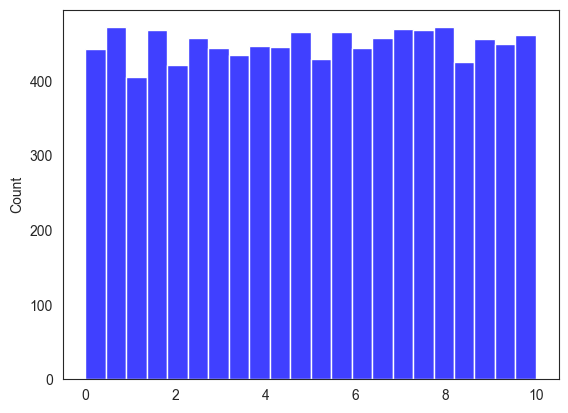

In [99]:
sns.histplot(data=cumsum_values_lt10, color="blue", label="exp")


In [100]:

unif_sample = np.random.uniform(0,10,100000)

<Axes: ylabel='Count'>

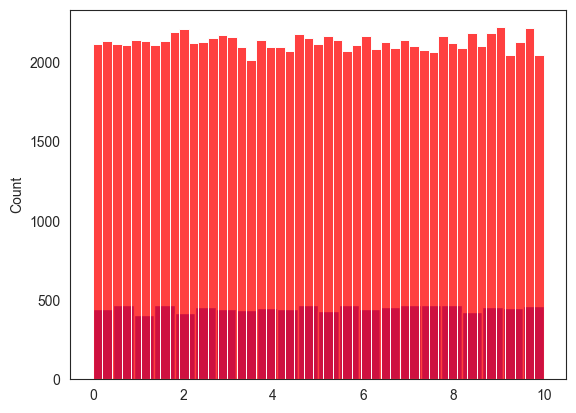

In [101]:
sns.histplot(data=cumsum_values_lt10, color="blue", label="exp")
sns.histplot(data=unif_sample, color="red", label="uni")


## Observations

It seems as though that the graph of the cumsum values less than ten follow a uniform distribution of 0 to 10. Although the uniform distribution has more points, it's pretty evident the cumsum distribution follows it. 

### Question 4: Maximum Index Analysis and Comparison with Poisson Distribution

4.1. For each column in `df_cumsum`, determine the maximum row index at which the cumulative sum remains less than or equal to `10`. Create a Series named `max_indices` that contains these indices (each index represents the number of observations or 'events' before exceeding 10).

Intuitively, `max_indices` counts the total number of arrivals before time `10`.


4.2. Generate `100,000` Poisson-distributed random samples with parameter $\lambda = 10 \times \lambda_{param}$  using `numpy.random.poisson`, storing the samples in `poisson_samples`.


4.3. Plot the density distribution of `max_indices` using `sns.histplot` and overlay the plot of `poisson_samples` on the same figure.


4.4. In a brief paragraph, compare the empirical distribution of `max_indices` with the theoretical Poisson distribution.


In [102]:
max_indices = []

for column in df_cumsum.columns:
    smaller = df_cumsum[[column]]
    smaller = smaller[smaller[column] < 10]
    max_indices.append(smaller[column].idxmax())

In [103]:
poisson_samples = np.random.poisson(10 * lambda_param, 10000)

In [104]:
smaller = df_cumsum[[0]]
smaller = smaller[smaller[0] < 10]
smaller[0].idxmax()

np.int64(5)

<Axes: ylabel='Count'>

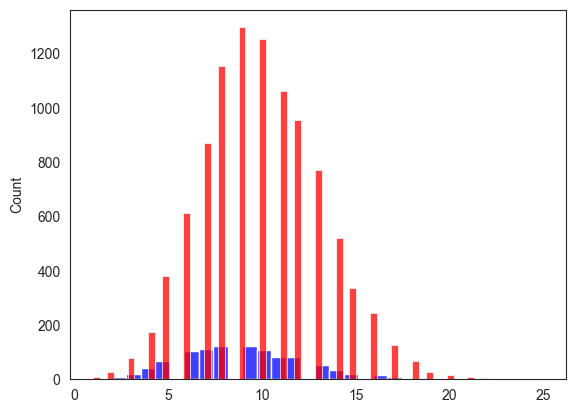

In [105]:
sns.histplot(data=max_indices, color="blue", label="maxindices")
sns.histplot(data=poisson_samples, color="red", label="poisson")


## Observation
It seems as though the plot of max indices from cumsum also follow the plot of the poisson distribution. Even though there is more poisson samples than cumsum it is evident that they realte to each other. 

In [106]:
old_df_cumsum = df_cumsum

### Question 5: Repetition with $\lambda_{param}=5$

- Repeat Questions 1 to 4 using a new rate parameter `lambda_param = 5`.
- Generate updated code and new distribution plots for:
  - Cumulative sum values compared with the uniform distribution.
  - Maximum row index compared with the Poisson distribution.


<Axes: ylabel='Count'>

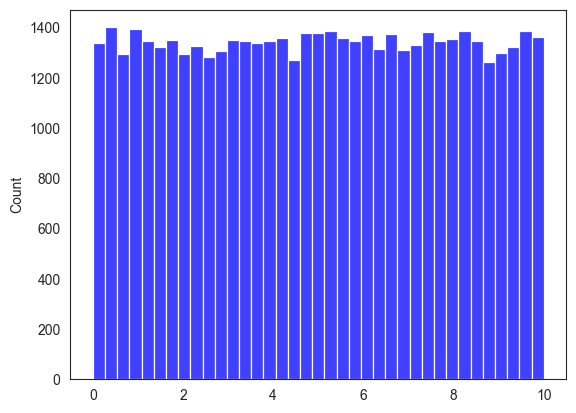

In [107]:
lambda_param = 5
expon_dist = stats.expon(scale=1/lambda_param)  # scale = 1/lambda

# Generate samples
expon_sample = expon_dist.rvs(size=(10000,1000))

df_exp = pd.DataFrame(expon_sample)

columndic = {}
for i in range(1000):
    columndic[i] = f'Trial_{i+1}'

df_exp.rename(columns=columndic)


df_cumsum = df_exp.cumsum()

rowdic = {}
for i in range(10000):
    rowdic[i] = i+1


df_cumsum.rename(columns=columndic, index=rowdic)

cumsum_values_lt10 = []

columns = df_cumsum.columns.tolist()

for _, i in df_cumsum.iterrows():
    for c in columns:
        if i[c] < 10:
            cumsum_values_lt10.append(i[c])

sns.histplot(data=cumsum_values_lt10, color="blue", label="exp")


<Axes: ylabel='Count'>

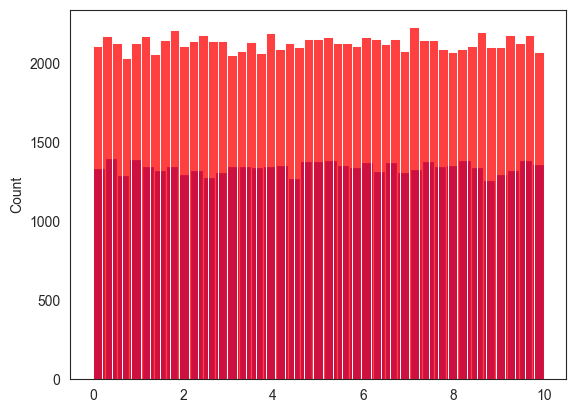

In [108]:

unif_sample = np.random.uniform(0,10,100000)
sns.histplot(data=cumsum_values_lt10, color="blue", label="exp")
sns.histplot(data=unif_sample, color="red", label="uni")


<Axes: ylabel='Count'>

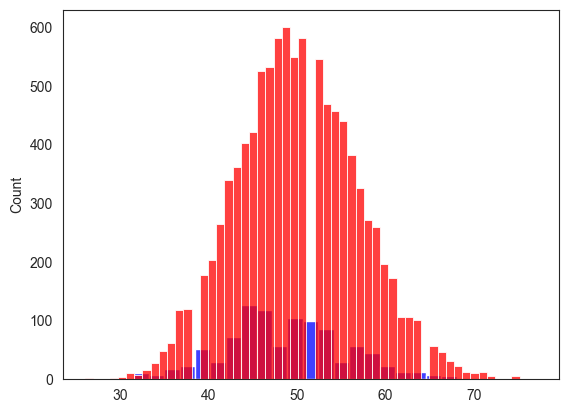

In [109]:
max_indices = []

for column in df_cumsum.columns:
    smaller = df_cumsum[[column]]
    smaller = smaller[smaller[column] < 10]
    max_indices.append(smaller[column].idxmax())

poisson_samples = np.random.poisson(10 * lambda_param, 10000)

smaller = df_cumsum[[0]]
smaller = smaller[smaller[0] < 10]
smaller[0].idxmax()

sns.histplot(data=max_indices, color="blue", label="maxindices")
sns.histplot(data=poisson_samples, color="red", label="poisson")


### Question 6: Joint Distribution

In this question, we focus on the number of arrivals before \(T=5\) and \(T=10\) for each trial (i.e., each column in `df_cumsum`). 

6.1. For each trial, compute:
   - The number of arrivals before \(T=5\) (i.e., the maximum row index where the cumulative sum is $\leq5$) and store these in a Series called `N_T5`.
   - The number of arrivals before \(T=10\) (i.e., the maximum row index where the cumulative sum is $\leq10$) and store these in a Series called `N_T10`.

6.2. Visualize the joint relationship between `N_T5` and `N_T10` using:
   - A scatter plot to explore their joint behavior.
   - Adding marginal distributions on the sides of the scatter plot.

6.3 What are marginal distributions for `N_T5` and `N_T10`? Are they correlated?

In [110]:
N_T10 = []

for column in old_df_cumsum.columns:
    smaller = df_cumsum[[column]]
    smaller = smaller[smaller[column] < 10]
    N_T10.append(smaller[column].idxmax())


N_T5 = []

for column in old_df_cumsum.columns:
    smaller = df_cumsum[[column]]
    smaller = smaller[smaller[column] < 5]
    N_T5.append(smaller[column].idxmax())



In [111]:
print(len(N_T10))
print(len(N_T5))

1000
1000


<Axes: >

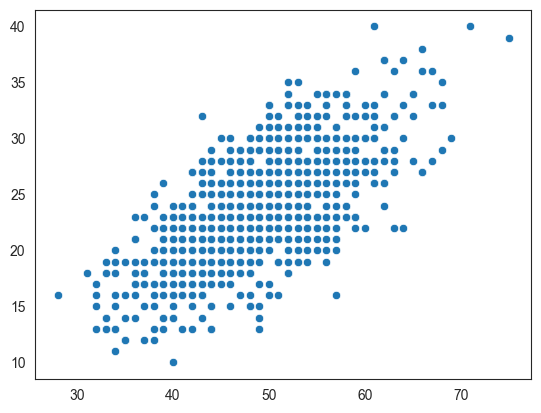

In [112]:
sns.scatterplot(x=N_T10, y=N_T5)

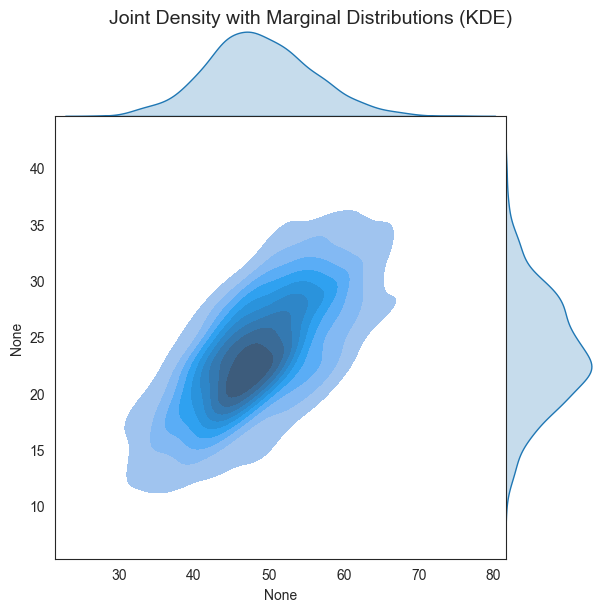

In [113]:
sns.set_style("white")
joint_kde = sns.jointplot(x=N_T10, y=N_T5, kind="kde", fill=True, space=0)
joint_kde.fig.suptitle("Joint Density with Marginal Distributions (KDE)", fontsize=14)
joint_kde.fig.subplots_adjust(top=0.95)  # Adjust title position

## SUBMITTING MY EXTRA CREDIT THING HERE IN CASE NO GRADESCOPE ASSIGNMENT MADE

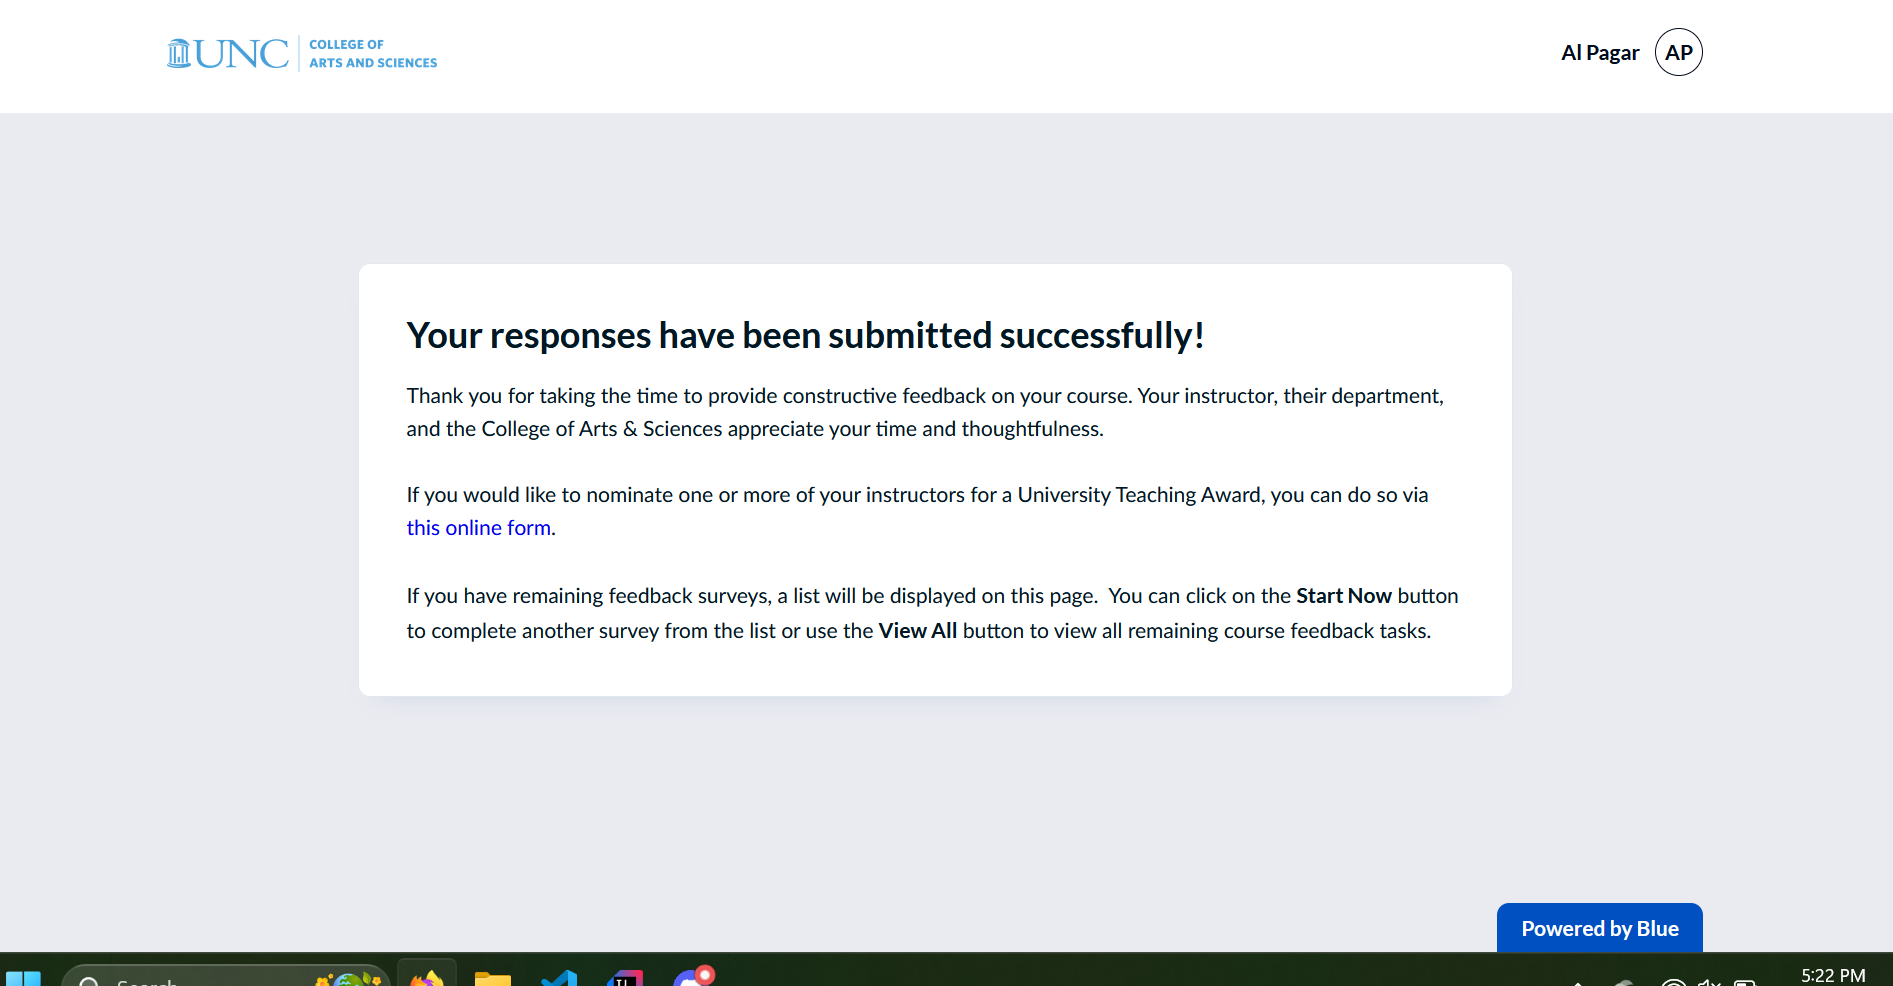

In [121]:
from PIL import Image
from IPython.display import display

# Open the image
img = Image.open('C:Screenshot 2025-04-22 172240.png')

# Display the image
display(img)